In [1]:
# Basic Libraries
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

from IPython.display import display_html 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
nbaData = pd.read_csv("all_seasons.csv")
nbaData

,Index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30,208.28,106.594120,Iowa,USA,Undrafted,0,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29,210.82,111.130040,Providence,USA,Undrafted,0,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22,205.74,106.594120,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,0,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28,200.66,99.790240,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25,195.58,97.522280,DePaul,USA,Undrafted,0,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31,203.20,98.883056,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


# 1. Filtering of Data

### Filtering Based on Season

In [3]:
all_seasons = []
years = []
for season in range(1996, 2000):
    if season + 1 - 1900 == 100:
        year = f"{season}-{'00'}"
    else:
        year = f'{season}-{season+1 - 1900}'
    years.append(year)
    all_seasons.append(nbaData[nbaData['season'] == year])
for season in range(2000, 2019):
    if season + 1 - 2000 < 10:
        year = f"{season}-{'0' + str(season+1-2000)}"
    else: 
        year = f'{season}-{season+1 - 2000}'
    years.append(year)
    all_seasons.append(nbaData[nbaData['season'] == year])

### Players who played less than 80% of the games during a particular season will be filtered out

In [4]:
cleanSeasons = [] 
bestPlayers = []
worstPlayers = []

for i in range(len(all_seasons)):
    season = all_seasons[i]
    maxGamesPlayedID = season['gp'].idxmax()
    maxGamesPlayed = season.loc[maxGamesPlayedID]
    maxGames = maxGamesPlayed['gp']

    if (maxGames >= 82):
        maxGames = 58
    else:
        maxGames *= 0.7
    
    mySeason = season[season['gp'] >= round(maxGames)]
    
    bestScorerID = mySeason['pts'].idxmax()
    worstScorerID = mySeason['pts'].idxmin()
    
    bestScorer = nbaData.loc[bestScorerID]
    worstScorer = nbaData.loc[worstScorerID]
    bestPlayers.append(bestScorer)
    worstPlayers.append(worstScorer)
    
    cleanSeasons.append(mySeason)
    
cleanNBA = pd.concat(cleanSeasons)

In [5]:
ave_points = []
for i in cleanSeasons:
    points = 0
    counter = 0
    for j in i['pts']:
        points += j
        counter += 1
    average = points / counter
    ave_points.append(round(average, 2))

data = {'Year': years,
        'Average_Points': ave_points}

dataSet = pd.DataFrame(data)
dataSet.dtypes

Year               object
Average_Points    float64
dtype: object

### Points against Years lineplot

<AxesSubplot:xlabel='Year', ylabel='Average_Points'>

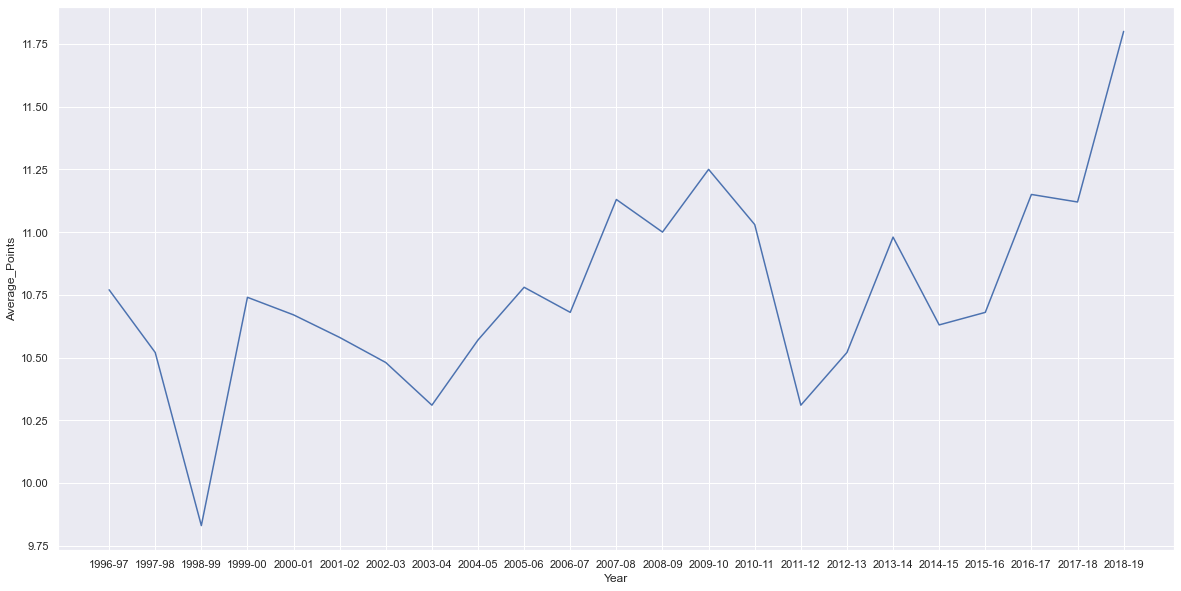

In [6]:
sb.set(rc = {'figure.figsize':(20, 10)})
sb.lineplot(data=data, x='Year', y='Average_Points')

### Boxplot of Points

,pts
count,5908.000000
mean,10.762305
std,5.690329
min,0.900000
25%,6.400000
50%,9.600000
75%,14.000000
max,36.100000


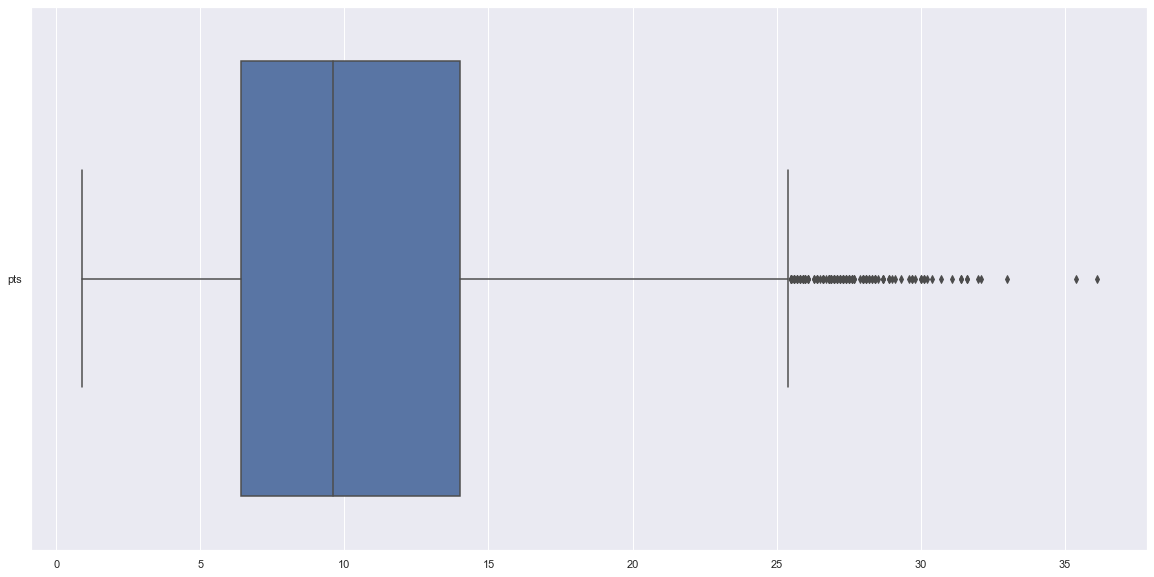

In [7]:
points = pd.DataFrame(cleanNBA['pts'])
sb.boxplot(data=points, orient='h')
points.describe()

### Identifying best and worst player for a particular season

In [8]:

season = cleanNBA[cleanNBA['season']=='1996-97']

#getting best and worst player
bestScorerID = season['pts'].idxmax()
bestScorer = season.loc[bestScorerID]
worstScorerID = season['pts'].idxmin()
worstScorer = season.loc[worstScorerID]


bestScorer = pd.DataFrame((cleanNBA.loc[season['pts'].idxmax()]))
worstScorer = pd.DataFrame((cleanNBA.loc[season['pts'].idxmin()]))


In [9]:
df1 = bestScorer
df2 = worstScorer

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:200px;margin-left:150px;'")
df2_style = df2.style.set_table_attributes("style='display:inline;'")
#print("------------------------------------------------------ Season " +season.loc[0]['season'] + " ------------------------------------------------------")
print("")
print("                            Best PPG                                          Worst PPG")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


                            Best PPG                                          Worst PPG


,47
Index,47
player_name,Michael Jordan
team_abbreviation,CHI
age,34
player_height,198.120000
player_weight,97.975872
college,North Carolina
country,USA
draft_year,1984
draft_round,1


# 2. Factors that contribute to player points

In [10]:
#For entire seasons
points = pd.DataFrame(cleanNBA['pts'])
age = pd.DataFrame(cleanNBA['age'])
net_rating = pd.DataFrame(cleanNBA['net_rating'])
usage_rate = pd.DataFrame(cleanNBA['usg_pct'])
games_played = pd.DataFrame(cleanNBA['gp'])

# ----------------------------------------------AGE----------------------------------------------

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
points_train, points_test, age_train, age_test = train_test_split(points, age, test_size=0.25)
#print("Train Set :", points_train.shape, age_train.shape)
#print("Test Set  :", points_test.shape, age_test.shape)

linreg = LinearRegression()
linreg.fit(age_train, points_train)

LinearRegression()

In [12]:
print('Intercept \t: a = ', linreg.coef_)
print('Coefficients \t: b = ', linreg.intercept_)

Intercept 	: a =  [[-0.07663945]]
Coefficients 	: b =  [12.91842286]


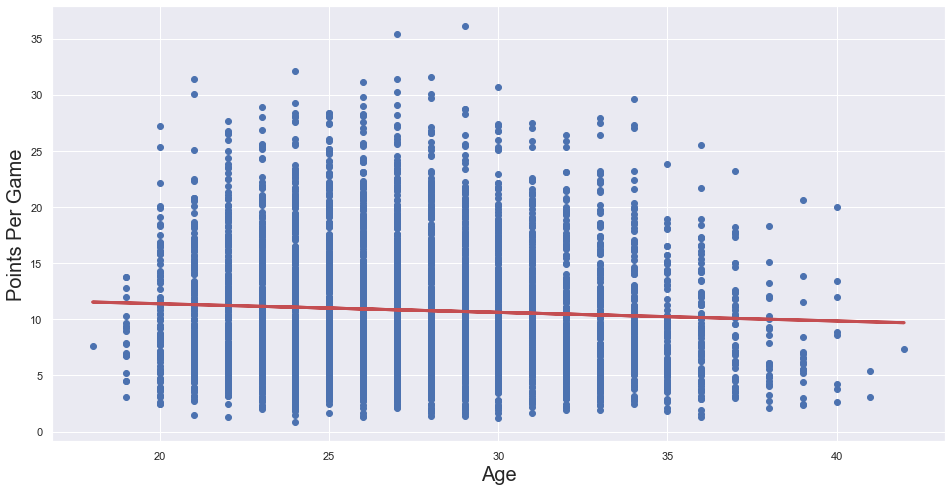

In [13]:
regline_x = age_train
regline_y = linreg.intercept_ + linreg.coef_ * age_train

f = plt.figure(figsize=(16, 8))
plt.scatter(age_train, points_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [14]:
points_test_pred = linreg.predict(age_test)
print("Explained Variance for the train dataset (R^2):", linreg.score(age_train, points_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseTest = mean_sq_err(points_test, points_test_pred)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.003198895932245649
Root Mean Squared Error for test dataset (RMSE): 5.576315875187623


# ----------------------------------------------Usage Rate----------------------------------------------

In [15]:
points_train2, points_test2, usgrate_train, usgrate_test = train_test_split(points, usage_rate, test_size=0.25)
print("Train Set :", points_train2.shape, usgrate_train.shape)
print("Test Set  :", points_test2.shape, usgrate_test.shape)

Train Set : (4431, 1) (4431, 1)
Test Set  : (1477, 1) (1477, 1)


In [16]:
linreg2 = LinearRegression()
linreg2.fit(usgrate_train, points_train2)

LinearRegression()

In [17]:
print('Intercept \t: a = ', linreg2.coef_)
print('Coefficients \t: b = ', linreg2.intercept_)

Intercept 	: a =  [[96.37258509]]
Coefficients 	: b =  [-7.79134642]


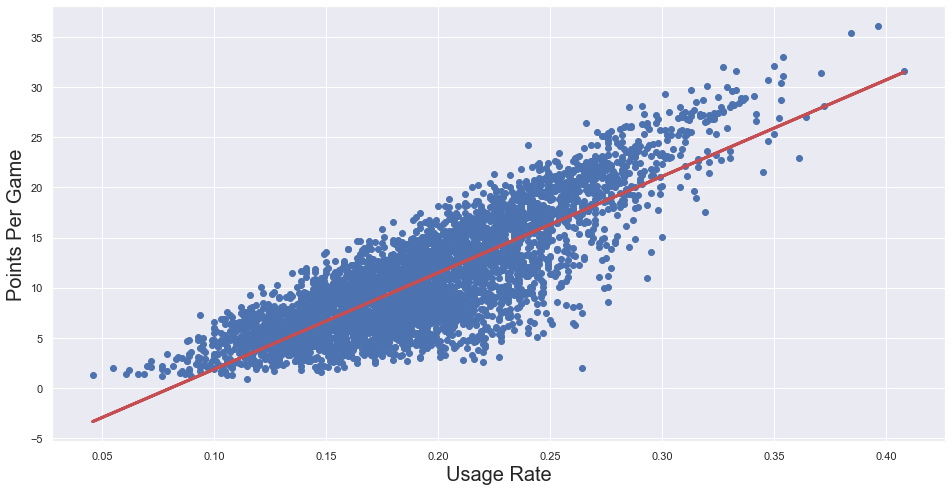

In [18]:
regline_x2 = usgrate_train
regline_y2 = linreg2.intercept_ + linreg2.coef_ * usgrate_train

f = plt.figure(figsize=(16, 8))
plt.scatter(usgrate_train, points_train2)
plt.plot(regline_x2, regline_y2, 'r-', linewidth = 3)
plt.xlabel('Usage Rate', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [19]:
points_test_pred2 = linreg2.predict(usgrate_test)
print("Explained Variance for the train dataset (R^2):", linreg2.score(usgrate_train, points_train2))
mseTest = mean_sq_err(points_test2, points_test_pred2)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.6853436349040934
Root Mean Squared Error for test dataset (RMSE): 3.209382495568258


# ----------------------------------------------Net Rating----------------------------------------------

In [20]:
points_train3, points_test3, netRating_train, netRating_test = train_test_split(points, net_rating, test_size=0.25)
print("Train Set :", points_train3.shape, netRating_train.shape)
print("Test Set  :", points_test3.shape, netRating_test.shape)

Train Set : (4431, 1) (4431, 1)
Test Set  : (1477, 1) (1477, 1)


In [21]:
linreg3 = LinearRegression()
linreg3.fit(netRating_train, points_train3)

LinearRegression()

In [22]:
print('Intercept \t: a = ', linreg3.coef_)
print('Coefficients \t: b = ', linreg3.intercept_)

Intercept 	: a =  [[0.18686157]]
Coefficients 	: b =  [10.64585697]


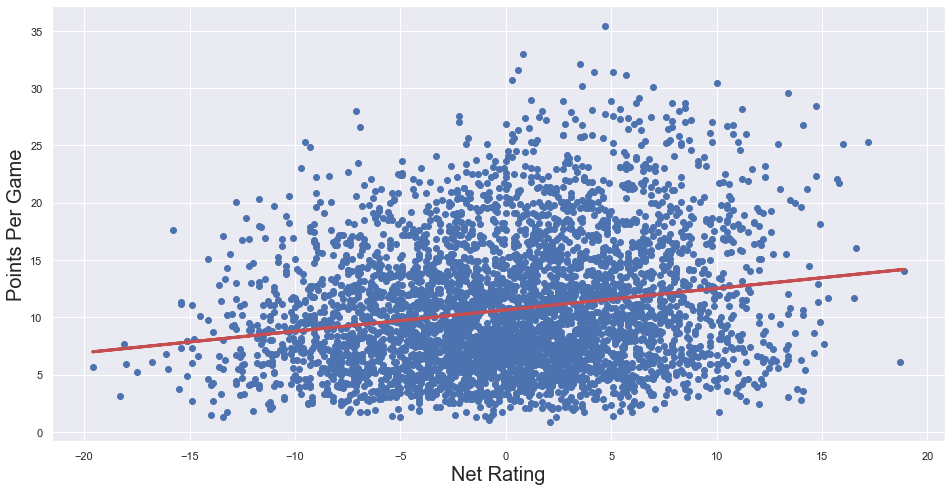

In [23]:
regline_x3 = netRating_train
regline_y3 = linreg3.intercept_ + linreg3.coef_ * netRating_train

f = plt.figure(figsize=(16, 8))
plt.scatter(netRating_train, points_train3)
plt.plot(regline_x3, regline_y3, 'r-', linewidth = 3)
plt.xlabel('Net Rating', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [24]:
points_test_pred3 = linreg3.predict(netRating_test)
print("Explained Variance for the train dataset (R^2):", linreg3.score(netRating_train, points_train3))
mseTest = mean_sq_err(points_test3, points_test_pred3)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.036938360025416284
Root Mean Squared Error for test dataset (RMSE): 5.820397297423994


# ----------------------------------------------Games Played----------------------------------------------

In [25]:
points_train4, points_test4, gp_train, gp_test = train_test_split(points, games_played, test_size=0.25)
print("Train Set :", points_train3.shape, netRating_train.shape)
print("Test Set  :", points_test3.shape, netRating_test.shape)

Train Set : (4431, 1) (4431, 1)
Test Set  : (1477, 1) (1477, 1)


In [26]:
linreg4 = LinearRegression()
linreg4.fit(netRating_train, points_train3)

LinearRegression()

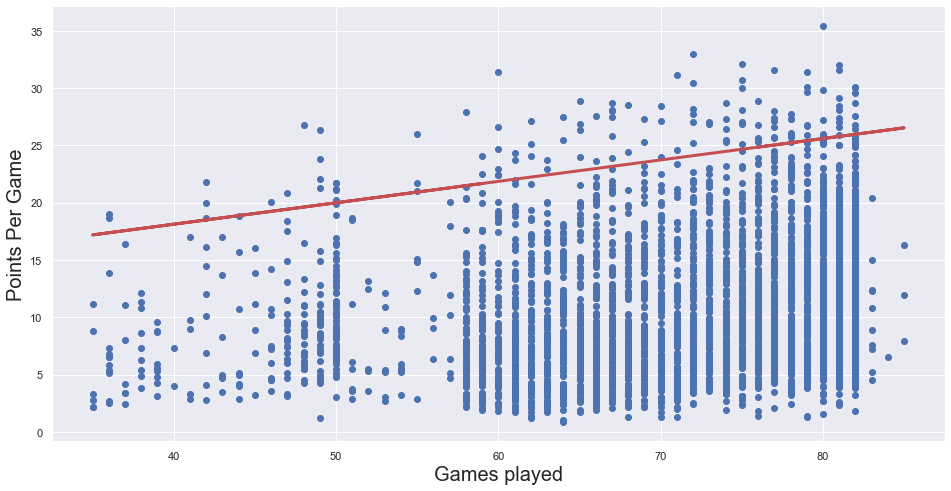

In [27]:
regline_x4 = gp_train
regline_y4 = linreg4.intercept_ + linreg4.coef_ * gp_train

f = plt.figure(figsize=(16, 8))
plt.scatter(gp_train, points_train4)
plt.plot(regline_x4, regline_y4, 'r-', linewidth = 3)
plt.xlabel('Games played', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

### Displaying the best player for each season

In [28]:
for i in range(len(bestPlayers)):
    print(bestPlayers[i])

Index                            47
player_name          Michael Jordan
team_abbreviation               CHI
age                              34
player_height                198.12
player_weight             97.975872
college              North Carolina
country                         USA
draft_year                     1984
draft_round                       1
draft_number                      3
gp                               82
pts                            29.6
reb                             5.9
ast                             4.3
net_rating                     13.4
oreb_pct                      0.042
dreb_pct                      0.132
usg_pct                       0.331
ts_pct                        0.567
ast_pct                       0.208
season                      1996-97
Name: 47, dtype: object
Index                           854
player_name          Michael Jordan
team_abbreviation               CHI
age                              35
player_height                198.12
play

### Displaying the worst player for each season

In [29]:
for i in range(len(worstPlayers)):
    print(worstPlayers[i])

Index                          376
player_name          Ivano Newbill
team_abbreviation              ATL
age                             26
player_height               208.28
player_weight            111.13004
college               Georgia Tech
country                        USA
draft_year                    1994
draft_round                      0
draft_number             Undrafted
gp                              72
pts                            1.4
reb                            2.8
ast                            0.3
net_rating                     2.5
oreb_pct                     0.104
dreb_pct                     0.189
usg_pct                      0.083
ts_pct                       0.439
ast_pct                      0.042
season                     1996-97
Name: 376, dtype: object
Index                            876
player_name             Michael Cage
team_abbreviation                NJN
age                               36
player_height                 205.74
player_weight       

# 3. Prediction of whether player was from draft round 1 or not

In [30]:
drafted = pd.DataFrame(nbaData['draft_round']) 
rating = pd.DataFrame(nbaData['net_rating']) # predictor
drafted['draft_round'] = drafted['draft_round'].replace([1], 'True')
drafted['draft_round'] = drafted['draft_round'].replace([0, 2, 3, 4, 5, 6, 7, 8], 'False')
drafted.columns = ['draftRound1']

In [31]:
y = pd.DataFrame(drafted["draftRound1"])
X = pd.DataFrame(nbaData["pts"])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (8775, 1) (8775, 1)
Test Set  : (2925, 1) (2925, 1)


### Displaying the Split between number of draft round 1 picks and those who were not

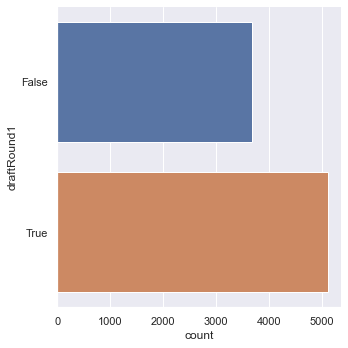

In [33]:
y_train["draftRound1"].value_counts()
sb.catplot(y = "draftRound1", data = y_train, kind = "count")

In [34]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                    

DecisionTreeClassifier(max_depth=2)

### Plotting out the decision tree

[Text(334.8, 543.6, 'pts <= 6.95\ngini = 0.487\nsamples = 8775\nvalue = [3667, 5108]\nclass = True'),
 Text(167.4, 326.16, 'pts <= 3.25\ngini = 0.49\nsamples = 4499\nvalue = [2572, 1927]\nclass = False'),
 Text(83.7, 108.72000000000003, 'gini = 0.437\nsamples = 1910\nvalue = [1295, 615]\nclass = False'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 2589\nvalue = [1277, 1312]\nclass = True'),
 Text(502.20000000000005, 326.16, 'pts <= 14.85\ngini = 0.381\nsamples = 4276\nvalue = [1095, 3181]\nclass = True'),
 Text(418.5, 108.72000000000003, 'gini = 0.433\nsamples = 3029\nvalue = [959, 2070]\nclass = True'),
 Text(585.9, 108.72000000000003, 'gini = 0.194\nsamples = 1247\nvalue = [136, 1111]\nclass = True')]

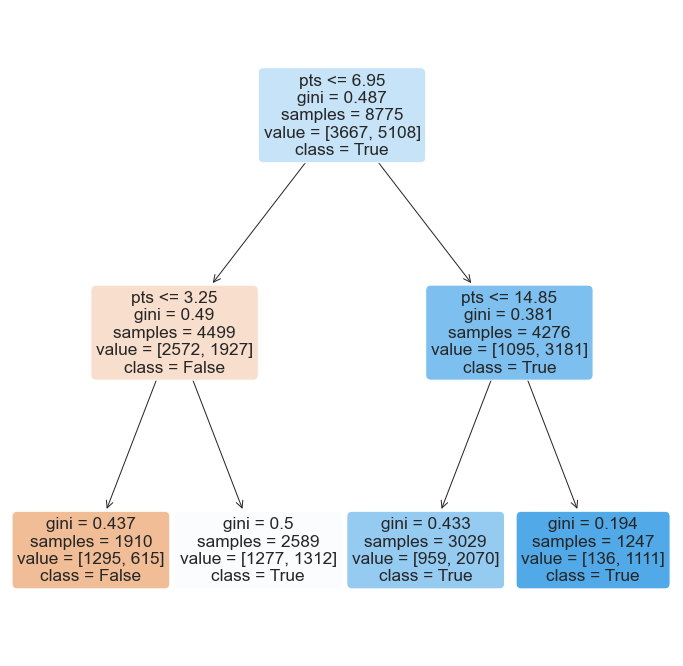

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["False","True"])

### Confusion Matrix

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6596011396011396

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6526495726495727



<AxesSubplot:>

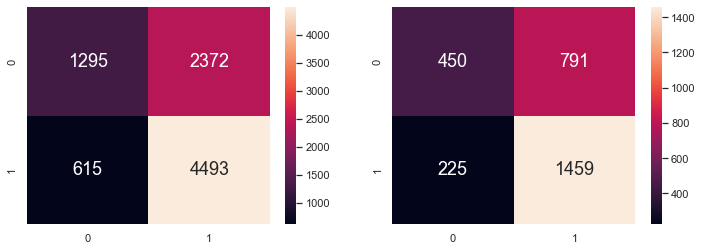

In [36]:
from sklearn.metrics import confusion_matrix
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [37]:
bestPlayerNames = []
for i in bestPlayers:
    bestPlayerNames.append(i['player_name'])
nbaData_pred = nbaData[nbaData["player_name"].isin(bestPlayerNames)]
nbaData_pred.drop_duplicates(subset ="player_name", inplace=True)
X_pred = pd.DataFrame(nbaData_pred['pts'])
y_pred = dectree.predict(X_pred)

C:\Users\aloys\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Predictions for the best players

In [38]:
y_pred = pd.DataFrame(y_pred, columns = ["IsRoundOnePickPred"], index = nbaData_pred.index)
nbaData_acc = pd.concat([nbaData_pred[["player_name", "draft_round"]], y_pred], axis = 1)
nbaData_acc

,player_name,draft_round,IsRoundOnePickPred
47,Michael Jordan,1,True
96,Kobe Bryant,1,True
200,Shaquille O'Neal,1,True
290,Allen Iverson,1,True
743,Tracy McGrady,1,True
3131,LeBron James,1,True
3343,Carmelo Anthony,1,True
3467,Dwyane Wade,1,True
5076,Kevin Durant,1,True
5551,Russell Westbrook,1,True


In [39]:
worstPlayerNames = []
for i in worstPlayers:
    worstPlayerNames.append(i['player_name'])
nbaData_pred2 = nbaData[nbaData["player_name"].isin(worstPlayerNames)]
nbaData_pred2.drop_duplicates(subset ="player_name", inplace=True)
X_pred = pd.DataFrame(nbaData_pred2['pts'])
y_pred = dectree.predict(X_pred)

C:\Users\aloys\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Predictions for the worst players

In [40]:
y_pred = pd.DataFrame(y_pred, columns = ["IsRoundOnePickPred"], index = nbaData_pred2.index)
nbaData_acc = pd.concat([nbaData_pred2[["player_name", "draft_round"]], y_pred], axis = 1)
nbaData_acc

,player_name,draft_round,IsRoundOnePickPred
0,Travis Knight,1,True
6,Mark West,2,False
51,Michael Cage,1,False
59,Jud Buechler,2,False
323,Ben Wallace,0,False
376,Ivano Newbill,0,False
687,Scot Pollard,1,False
1147,Nazr Mohammed,1,False
1324,Michael Ruffin,2,False
1780,Mark Madsen,1,False


### Prediction accuracy for the worst players

In [42]:
true_counter = 0
draft_round = []
draft_round_pred = []
for i in nbaData_acc['draft_round']:
    draft_round.append(i)

for j in nbaData_acc["IsRoundOnePickPred"]:
    draft_round_pred.append(j)
    
for k in range(len(draft_round)):
    if draft_round[k] == 1 and draft_round_pred[k] == "True":
        true_counter += 1
    if draft_round[k] != 1 and draft_round_pred[k] == "False":
        true_counter += 1
        
percentage_correct = true_counter / len(draft_round) * 100
percentage_correct

52.38095238095239